# Image

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir


from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,Flatten, Dense, Dropout

import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

import os

#Path-----

path = "new_img/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

import time
tempsX = time.time()
def _time_(x):
    duration1 = time.time()-tempsX
    return print("temps de traitement "+ str(x) + " : ",  round(duration1/60,2), "minutes")


mA = pd.read_csv('mDataImgName.csv')
mB = pd.read_csv('mDataImgNumm.csv')
mC = pd.read_csv('mDataImgCat.csv')

df = mA.join(mB)
df = df.join(mC)
df = df.rename(columns={'img_name': 'id','Img_Cat_' : 'label', 'img_Num' : 'num'})

model_savepath    = 'cnn_vgg16_model_trained_2.h5'     

TRAINING_DIR      = 'img_train_/'
TESTING_DIR       = 'img_test_/'

IMGSIZE       = 224    # Taille de l'image en input
EPOCH         = 22     # nombre d'epoch 
BATCH_SIZE    = 16     # traitement par batch d'images avant la descente de gradient
FREEZE_LAYERS = 15     # pour un VGG16 freeze de réapprentissage de certaines couches
TRAIN         = True 

_time_("#IMG 1 - model_savepath")

_count = df.num < 210
df_test = df[_count]
count_ = df.num >= 210
df_train = df[ count_]

_time_("#IMG 2 - Tes-Train CNN ")

train_datagen =  ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.20)
_time_("#IMG 3 - train_datagen")

train_generator = train_datagen.flow_from_dataframe(
            df_train,
            TRAINING_DIR,
            x_col='id',
            y_col='label',
            has_ext=True,
            shuffle=True,
            target_size=(224, 224),
            batch_size=BATCH_SIZE,
            subset='training',
            class_mode='categorical')

_time_("#IMG 4 - train_generator")


from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_generator.classes)
_time_("#IMG 5 - train_labels")

valid_generator = \
        train_datagen.flow_from_dataframe(
            df_train,
            TRAINING_DIR,
            x_col='id',
            y_col='label',
            has_ext=True,
            shuffle=True,
            target_size=(224, 224),
            batch_size=BATCH_SIZE,
            subset='validation',
            class_mode='categorical')

_time_("#IMG 6 - valid_generator")

test_files = os.listdir(TESTING_DIR)
df_test = pd.DataFrame({"id": test_files, 'label': 'nan'})
print(df_test.shape)

_time_("#IMG 7 - df_test")

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)    

_time_("#IMG 8 - test_datagen")

test_generator = \
    test_datagen.flow_from_dataframe(
        df_test, 
        TESTING_DIR, 
        x_col='id',
        y_col=None, 
        has_ext=True, 
        target_size=(IMGSIZE, IMGSIZE), 
        class_mode=None, 
        seed=42,
        batch_size=1, 
        shuffle=False  )

_time_("#IMG 9 - test_generator")




1051
temps de traitement #IMG 1 - model_savepath :  0.0 minutes
temps de traitement #IMG 2 - Tes-Train CNN  :  0.01 minutes
temps de traitement #IMG 3 - train_datagen :  0.01 minutes
Found 672 validated image filenames belonging to 7 classes.
temps de traitement #IMG 4 - train_generator :  0.01 minutes
temps de traitement #IMG 5 - train_labels :  0.01 minutes
Found 168 validated image filenames belonging to 7 classes.
temps de traitement #IMG 6 - valid_generator :  0.01 minutes
(212, 2)
temps de traitement #IMG 7 - df_test :  0.01 minutes
temps de traitement #IMG 8 - test_datagen :  0.01 minutes
Found 210 validated image filenames.
temps de traitement #IMG 9 - test_generator :  0.01 minutes


--- Logging error ---
Traceback (most recent call last):
  File "/Users/soso/opt/anaconda3/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/Users/soso/opt/anaconda3/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/Users/soso/opt/anaconda3/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/Users/soso/opt/anaconda3/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/soso/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/soso/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/soso/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_ins

In [2]:
from keras.applications.resnet50 import ResNet50
base_model = Sequential()
base_model.add(ResNet50(include_top=False, pooling='avg'))
base_model.add(Dense(7, activation='softmax'))
base_model.layers[0].trainable = False
#base_model.summary()

_time_("#IMG 10 - test_generator")



temps de traitement #IMG 10 - test_generator :  0.04 minutes


In [3]:

base_model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['acc'])



_time_("#IMG 11 - base_model")



temps de traitement #IMG 11 - base_model :  0.04 minutes


In [4]:
base_model.fit_generator(
                 generator=train_generator,
                 steps_per_epoch = 30,
                 validation_data = valid_generator,
                 validation_steps = 10,
                 epochs = 5)
     
_time_("#IMG 12 - history")



Epoch 1/5
30/30 [==============================] - 119s 3s/step - loss: 1.6438 - acc: 0.4193 - val_loss: 0.7081 - val_acc: 0.7688
Epoch 2/5
30/30 [==============================] - 93s 3s/step - loss: 0.6555 - acc: 0.7812 - val_loss: 0.7072 - val_acc: 0.7875
Epoch 3/5
30/30 [==============================] - 98s 3s/step - loss: 0.4677 - acc: 0.8429 - val_loss: 0.5556 - val_acc: 0.8438
Epoch 4/5
30/30 [==============================] - 125s 4s/step - loss: 0.3961 - acc: 0.8757 - val_loss: 0.5872 - val_acc: 0.8188
Epoch 5/5
30/30 [==============================] - 112s 4s/step - loss: 0.3206 - acc: 0.8993 - val_loss: 0.5795 - val_acc: 0.8188
temps de traitement #IMG 12 - history :  9.22 minutes


In [5]:
# Evaluation du modèle
(eval_loss, eval_accuracy) = base_model.evaluate_generator(generator=valid_generator, steps=30)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

_time_("#IMG 13 - Evaluation")


[INFO] accuracy: 82.74%
[INFO] Loss: 0.5534515380859375
temps de traitement #IMG 13 - Evaluation :  9.59 minutes


In [6]:
image = tf.keras.preprocessing.image.load_img('new_img/10-Watches.jpg')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)


(1, 1343, 1948, 3)


In [7]:
mListImg = pd.read_csv('mDataImgName.csv')
mListImg = mListImg.img_name.tolist()

In [10]:
lst_pred = []
st = 'new_img/'
k = 0
for i in mListImg:
    sys.stdout.write("\rDoing thing %i" % k)
    image = tf.keras.preprocessing.image.load_img(st+ str(i) ,target_size=(224,224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = base_model.predict(input_arr)
    predictions = pd.DataFrame(predictions)
    lst_pred.append(predictions)
    k+=1
    
print("=================================")
    

lst_pred = pd.DataFrame(np.concatenate(lst_pred))
lst_pred

,0,1,2,3,4,5,6
0,0.000242,0.997449,0.000252,0.001270,0.000009,0.000610,0.000169
1,0.000749,0.137674,0.811029,0.023081,0.000127,0.024325,0.003014
2,0.015134,0.004095,0.942446,0.030136,0.003511,0.002809,0.001869
3,0.000398,0.317578,0.677359,0.001954,0.000079,0.001307,0.001325
4,0.000021,0.000441,0.000116,0.000392,0.000002,0.000038,0.998990
...,...,...,...,...,...,...,...
1045,0.008222,0.487547,0.455318,0.028185,0.000528,0.008436,0.011765
1046,0.004163,0.019631,0.000403,0.960679,0.001059,0.002273,0.011791
1047,0.294940,0.012018,0.000148,0.235250,0.438427,0.003222,0.015994
1048,0.022714,0.094095,0.131290,0.642090,0.079914,0.006834,0.023062


# TXT

In [11]:
# Base
from IPython.display import Audio
import warnings
from tqdm import tqdm
import numpy as np
import pandas as pd
# Graph
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Loop compteur
# Warning
warnings.simplefilter(action='ignore', category=Warning)
# Notif audio
import time
tempsX = time.time()
def _time_(x):
    duration1 = time.time()-tempsX
    return print("temps de traitement "+ str(x) + " : ",  round(duration1/60,2), "minutes")

def mFinito():
    display(Audio('/Users/soso/Downloads/son_multiplex_canal_plus.mp3', autoplay=True))

from keras.preprocessing.sequence import pad_sequences
# Notif Chrome
#%load_ext jupyternotify
# Largeur colonne
#pd.set_option('max_colwidth', 200)
# df create

from sklearn.model_selection import train_test_split

def _df_(x):
    return pd.DataFrame(x)

#Add
import gensim
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import gensim
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
X = pd.read_csv('m_x_df_TXT.csv')
y = pd.read_csv('m_y_df_TXT.csv')
print(X.shape)
print(y.shape)
_time_("#TXT 1 - import_img_")

_time_("#TXT 2 - _create_X_")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

_time_("#TXT 3 - train_test_split")

import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, SpatialDropout1D


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


print('X.shape[1]------', X.shape[1])
model = tf.keras.Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_time_("#TXT 4 - compile")

epochs = 10
batch_size = 64


history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

_time_("#TXT 5 - model.fit(")

scores = model.evaluate(X_test, y_test, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

_time_("#TXT 6 - model.evaluate")



(1050, 10)
(1050, 7)
temps de traitement #TXT 1 - import_img_ :  0.07 minutes
temps de traitement #TXT 2 - _create_X_ :  0.07 minutes
Shape of training data: 
(735, 10)
(735, 7)
Shape of test data: 
(315, 10)
(315, 7)
temps de traitement #TXT 3 - train_test_split :  0.07 minutes
X.shape[1]------ 10
temps de traitement #TXT 4 - compile :  0.07 minutes
Epoch 1/10
11/11 [==============================] - 5s 140ms/step - loss: 1.9307 - accuracy: 0.3828 - val_loss: 1.9030 - val_accuracy: 0.6486
Epoch 2/10
11/11 [==============================] - 1s 100ms/step - loss: 1.8517 - accuracy: 0.6581 - val_loss: 1.7668 - val_accuracy: 0.6351
Epoch 3/10
11/11 [==============================] - 1s 100ms/step - loss: 1.5264 - accuracy: 0.6354 - val_loss: 1.3441 - val_accuracy: 0.5946
Epoch 4/10
11/11 [==============================] - 1s 109ms/step - loss: 1.0162 - accuracy: 0.6702 - val_loss: 0.8230 - val_accuracy: 0.6892
Epoch 5/10
11/11 [==============================] - 1s 102ms/step - loss: 0.570

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

_time_("#TXT 6 - model.evaluate")



Accuracy: 86.67%
temps de traitement #TXT 6 - model.evaluate :  0.33 minutes


In [28]:
lst_pred_txt = []
st = 'new_img/'
k = 0
for i in range(len(X)):
    input_arr = np.array([X.iloc[i]])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    sys.stdout.write("\rDoing thing %i" % k)
    sys.stdout.flush()
    lst_pred_txt.append(predictions)
    k+=1
    
print("=================================")
    

lst_pred_txt = pd.DataFrame(np.concatenate(lst_pred_txt))
lst_pred_txt

Doing thing 1049=================================


,0,1,2,3,4,5,6
0,0.004729,0.000199,0.003554,0.001104,0.990286,0.000028,0.000100
1,0.990802,0.000004,0.000101,0.003035,0.005064,0.000007,0.000987
2,0.992932,0.000003,0.000053,0.003908,0.001026,0.000009,0.002069
3,0.033725,0.000195,0.002801,0.007352,0.955568,0.000066,0.000294
4,0.113690,0.000175,0.002734,0.013565,0.869163,0.000079,0.000594
...,...,...,...,...,...,...,...
1045,0.980145,0.000003,0.000040,0.017510,0.000766,0.000013,0.001524
1046,0.981421,0.000004,0.000065,0.015266,0.001780,0.000012,0.001453
1047,0.993489,0.000002,0.000036,0.003728,0.000545,0.000007,0.002192
1048,0.069890,0.000020,0.000093,0.927960,0.001641,0.000147,0.000250


# Reunion

In [33]:
lst_pred_txt = lst_pred_txt.reset_index()
lst_pred = lst_pred.reset_index()

print(lst_pred_txt.shape, lst_pred.shape)

(1050, 8) (1050, 8)


In [120]:
X_def = pd.merge(lst_pred_txt, lst_pred, on="index")
X_def.pop('index')
X_def["new_0"] = (X_def['0_x'] + (X_def['0_x'])*2)
X_def["new_1"] = (X_def['1_x'] + (X_def['1_x'])*2)
X_def["new_2"] = (X_def['2_x'] + (X_def['2_x'])*2)
X_def["new_3"] = (X_def['3_x'] + (X_def['3_x'])*2)
X_def["new_4"] = (X_def['4_x'] + (X_def['4_x'])*2)
X_def["new_5"] = (X_def['5_x'] + (X_def['5_x'])*2)
X_def["new_6"] = (X_def['6_x'] + (X_def['6_x'])*2

In [121]:
X_def = X_def[["new_0","new_1","new_2","new_3","new_4","new_5","new_6"]]

In [122]:
X_def_T = X_def.T

In [123]:
maxValueIndex = X_def_T.idxmax()
maxValueIndex = pd.DataFrame(maxValueIndex)
maxValueIndex["max_lab"] = maxValueIndex[0].str.split("_",expand=True,)[1]
maxValueIndex.pop(0)
print()

In [124]:
mOrgCat = pd.read_csv('mDataCatLab.csv')
X__d = mOrgCat.join(maxValueIndex)

#print("Accuracy Score -> ",accuracy_score(X__d['max_lab'].value, X__d['cat_label'])*100)

In [125]:
X__d_1 = X__d.cat_label.tolist()
X__d_2 = X__d.max_lab.tolist()

In [126]:
ints = [int(item) for item in X__d_1]
ints_ = [int(item) for item in X__d_2]

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(ints, ints_)


0.9495238095238095

In [132]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", X_def.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(X_def)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)


_time_(" #6 Reduction Dim")

Dimensions dataset avant réduction PCA :  (1050, 7)
Dimensions dataset après réduction PCA :  (1050, 6)
(1050, 2)
temps de traitement  #6 Reduction Dim :  50.43 minutes


# Non-SuperVisé

# Regroupe Donnée + Target

In [135]:
X_d_c = X__d.join(df_tsne)
X_d_c

,cat_label,max_lab,tsne1,tsne2
0,4,4,-6.876865,-51.890968
1,0,0,46.660221,-20.027735
2,0,0,46.523426,-23.336683
3,4,4,-3.671900,-68.962196
4,4,4,-0.712153,-69.047302
...,...,...,...,...
1045,0,0,49.555546,-19.218670
1046,0,0,49.629707,-19.355537
1047,0,0,45.713562,-23.690693
1048,0,3,4.887799,41.228577


# Point trouvé f(x) des vrais Categories

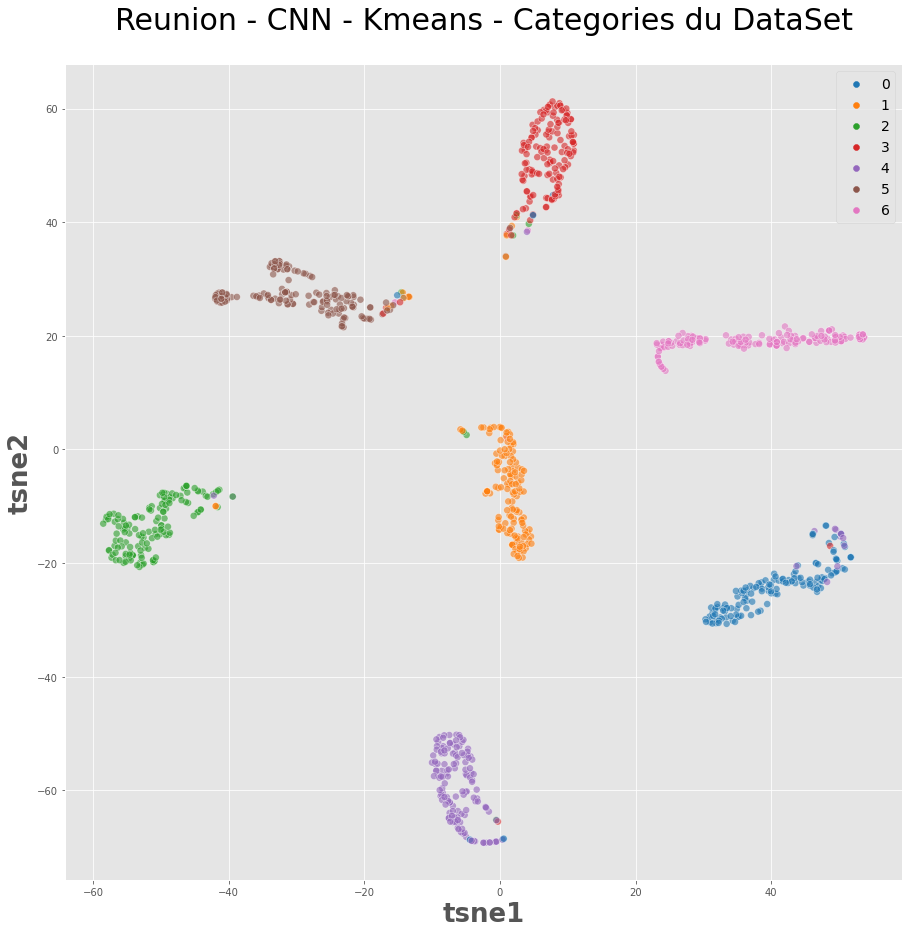

In [185]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cat_label", data=X_d_c, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Reunion - CNN - Kmeans - Categories du DataSet', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


# Graph Cluster Trouvé

In [137]:
from sklearn import cluster, metrics
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(df_tsne)
X_d_c["cluster"] = cls.labels_

In [154]:
result = []

def linear_order_clustering(km_labels, outlier_tolerance = 1):
    '''Expects clustering outputs as an array/list'''
    prev_label = km_labels[0] #keeps track of last seen item's real cluster
    cluster = 0 #like a counter for our new linear clustering outputs
    result = [cluster] #initialize first entry
    for i, label in enumerate(km_labels[1:]):
        if prev_label == label: 
            #just written for clarity of control flow, 
            #do nothing special here
            pass 
        else: #current cluster label did not match previous label
            #check if previous cluster label reappears 
            #on the right of current cluster label position 
            #(aka current non-matching cluster is sandwiched 
            #within a reasonable tolerance)
            if (outlier_tolerance and 
                prev_label in km_labels[i + 1: i + 2 + outlier_tolerance]):                     label = prev_label #if so, overwrite current label
            else:
                cluster += 1 #its genuinely a new cluster
        result.append(cluster)
        prev_label = label
        return result

In [155]:
a = linear_order_clustering(cls.labels_, 1)
a

[0, 1]

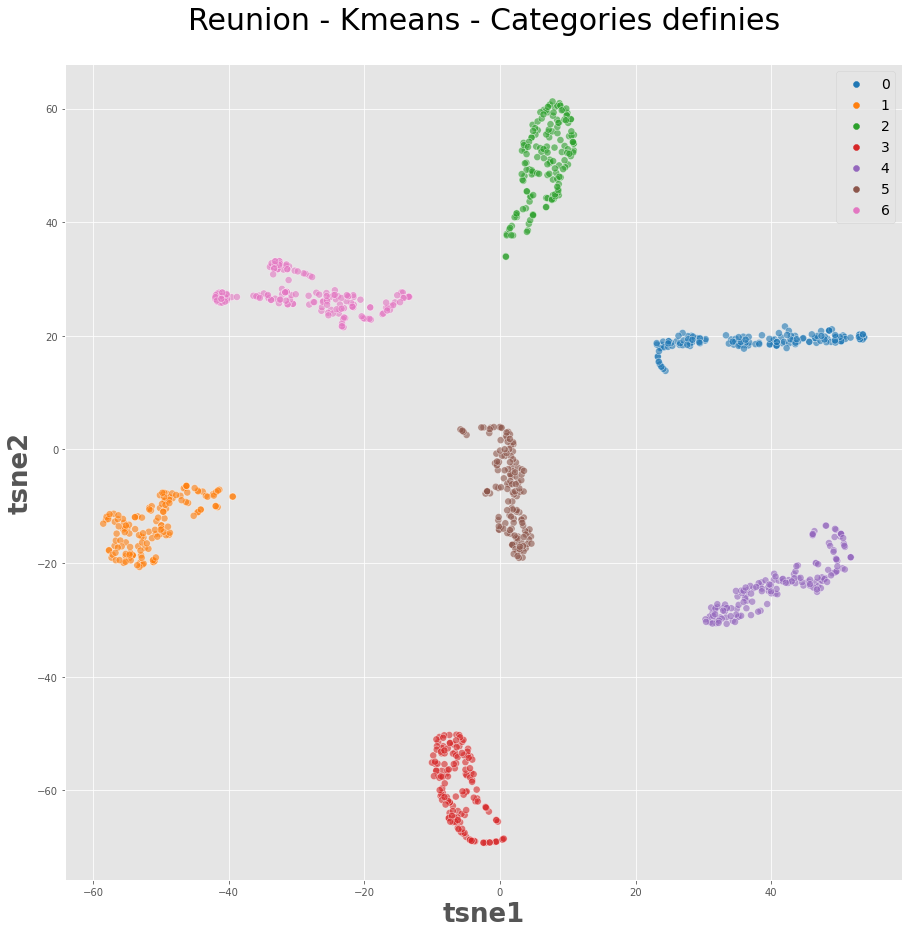

In [182]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cluster", data=X_d_c, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Reunion - Kmeans - Categories definies', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [141]:
print("Kmeans - Accuracy Score -> ",accuracy_score(X_d_c.cluster, X_d_c.cat_label)*100)
print("Kmeans -  ARI : ", metrics.adjusted_rand_score(X_d_c.cluster, X_d_c.cat_label)*100)

Kmeans - Accuracy Score ->  1.7142857142857144
Kmeans -  ARI :  88.79374657091209


In [ ]:
# SuperVisé

In [157]:
X_d_c.head(50)

,cat_label,max_lab,tsne1,tsne2,cluster
0,4,4,-6.876865,-51.890968,3
1,0,0,46.660221,-20.027735,4
2,0,0,46.523426,-23.336683,4
3,4,4,-3.671900,-68.962196,3
4,4,4,-0.712153,-69.047302,3
5,6,6,41.610161,18.721571,0
6,6,6,30.268373,19.168774,0
7,6,6,23.812012,18.426687,0
8,6,6,30.337402,19.416229,0
9,6,3,4.114942,38.551846,2


In [173]:
result = []


def linear_order_clustering(i):
    if i == 0:
        i = 6
    elif i == 1:
        i = 2
    elif i == 2:
        i = 3
    elif i == 3:
        i = 4
    elif i == 4:
        i = 0
    elif i == 5:
        i = 1
    elif i == 6:
        i = 5
    return i


new_clus = []

for i in X_d_c.cluster:
    new_clus.append(linear_order_clustering(i))

new_clus = pd.DataFrame(new_clus)

,0
0,4
1,0
2,0
3,4
4,4
...,...
1045,0
1046,0
1047,0
1048,3


In [177]:
X_d_c = X_d_c.join(new_clus)
X_d_c

,cat_label,max_lab,tsne1,tsne2,cluster,0
0,4,4,-6.876865,-51.890968,3,4
1,0,0,46.660221,-20.027735,4,0
2,0,0,46.523426,-23.336683,4,0
3,4,4,-3.671900,-68.962196,3,4
4,4,4,-0.712153,-69.047302,3,4
...,...,...,...,...,...,...
1045,0,0,49.555546,-19.218670,4,0
1046,0,0,49.629707,-19.355537,4,0
1047,0,0,45.713562,-23.690693,4,0
1048,0,3,4.887799,41.228577,2,3


In [ ]:
# Cluster Trouvé

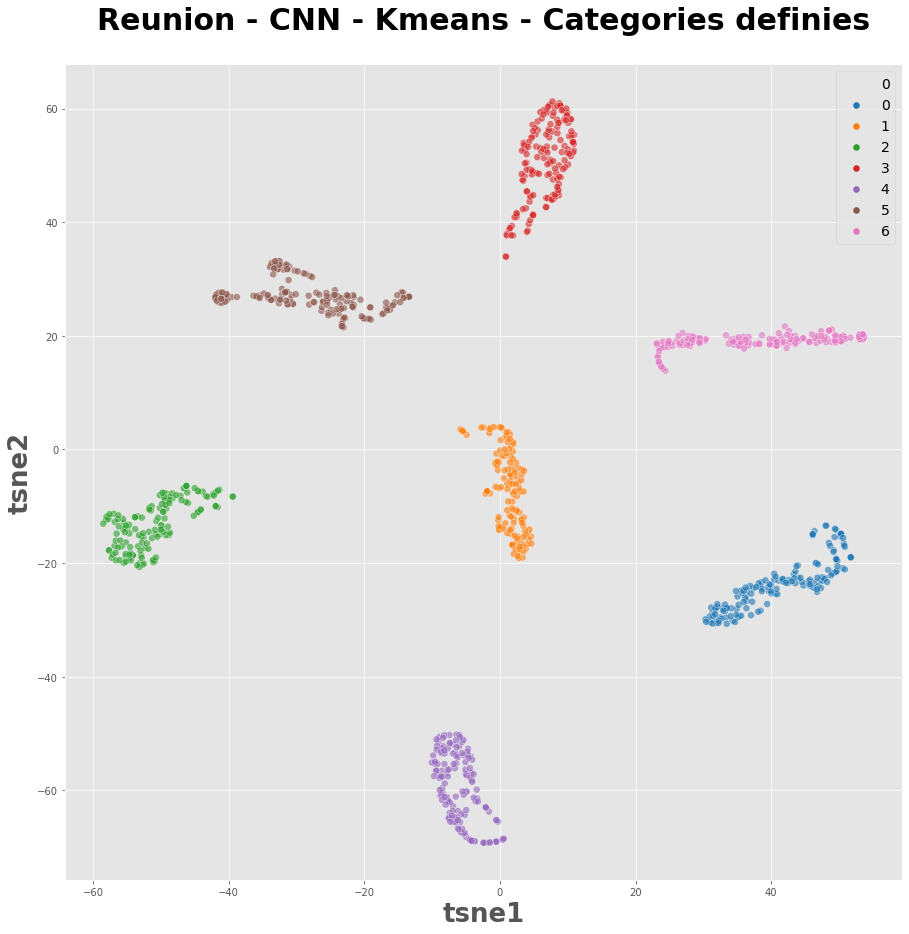

In [186]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue=0, data=X_d_c, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Reunion - CNN - Kmeans - Categories definies', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


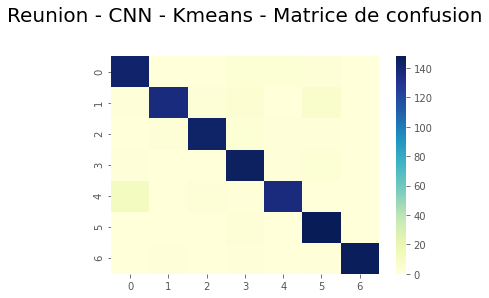

In [188]:
cm = confusion_matrix(X_d_c.cat_label, X_d_c[0])
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Reunion - CNN - Kmeans - Matrice de confusion', fontsize = 20, pad = 35)
plt.show()